In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
from google.colab import drive
drive.mount('/content/drive')
base_dir = '/content/drive/MyDrive/StrukturData/Dataset.csv'
df_red =pd.read_csv(base_dir)
df_red 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Usia (Tahun),Lila (cm),Hb (gr%),Paritas,Interval (bulan),Tinggi Badan(cm),Tinggi Badan(m),BB hamil (kg),IMT,risiko hamil,R1,R2,R3,R4,R5,R6
0,32.0,25.0,11.3,1.0,48.0,158.0,1.58,49.0,19.628265,1.0,NaN,1.0,NaN,1.0,NaN,1.0
1,29.0,24.0,11.4,1.0,96.0,153.0,1.53,49.0,20.932120,1.0,NaN,NaN,1.0,NaN,NaN,1.0
2,23.0,27.0,12.0,0.0,0.0,153.0,1.53,49.0,20.932120,1.0,NaN,NaN,1.0,NaN,NaN,1.0
3,28.0,28.0,11.6,0.0,0.0,155.0,1.55,60.0,24.973985,1.0,NaN,1.0,NaN,1.0,NaN,1.0
4,24.0,28.0,12.0,1.0,72.0,150.0,1.50,58.0,25.777778,1.0,NaN,NaN,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R2 : Pijat Ibu Hamil,NaN,NaN,NaN,NaN,NaN
397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R3 : Yoga Ibu Hamil,NaN,NaN,NaN,NaN,NaN
398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R4 : Hypnoterapi,NaN,NaN,NaN,NaN,NaN
399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R5 : Akupresur,NaN,NaN,NaN,NaN,NaN


In [ ]:
data =df_red.iloc[:393,:10]
data

,Usia (Tahun),Lila (cm),Hb (gr%),Paritas,Interval (bulan),Tinggi Badan(cm),Tinggi Badan(m),BB hamil (kg),IMT,risiko hamil
0,32.0,25.0,11.3,1.0,48.0,158.0,1.58,49.0,19.628265,1.0
1,29.0,24.0,11.4,1.0,96.0,153.0,1.53,49.0,20.932120,1.0
2,23.0,27.0,12.0,0.0,0.0,153.0,1.53,49.0,20.932120,1.0
3,28.0,28.0,11.6,0.0,0.0,155.0,1.55,60.0,24.973985,1.0
4,24.0,28.0,12.0,1.0,72.0,150.0,1.50,58.0,25.777778,1.0
...,...,...,...,...,...,...,...,...,...,...
388,26.0,24.0,12.6,0.0,0.0,152.0,1.52,51.0,22.074100,1.0
389,38.0,25.0,11.2,1.0,144.0,150.0,1.50,45.0,20.000000,2.0
390,35.0,27.0,11.9,1.0,60.0,156.0,1.56,55.0,22.600263,1.0
391,30.0,28.0,11.6,1.0,96.0,153.0,1.53,60.0,25.631167,1.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = data.drop('Tinggi Badan(m)', 1)
data

,Usia (Tahun),Lila (cm),Hb (gr%),Paritas,Interval (bulan),Tinggi Badan(cm),BB hamil (kg),IMT,risiko hamil
0,32.0,25.0,11.3,1.0,48.0,158.0,49.0,19.628265,1.0
1,29.0,24.0,11.4,1.0,96.0,153.0,49.0,20.932120,1.0
2,23.0,27.0,12.0,0.0,0.0,153.0,49.0,20.932120,1.0
3,28.0,28.0,11.6,0.0,0.0,155.0,60.0,24.973985,1.0
4,24.0,28.0,12.0,1.0,72.0,150.0,58.0,25.777778,1.0
...,...,...,...,...,...,...,...,...,...
388,26.0,24.0,12.6,0.0,0.0,152.0,51.0,22.074100,1.0
389,38.0,25.0,11.2,1.0,144.0,150.0,45.0,20.000000,2.0
390,35.0,27.0,11.9,1.0,60.0,156.0,55.0,22.600263,1.0
391,30.0,28.0,11.6,1.0,96.0,153.0,60.0,25.631167,1.0


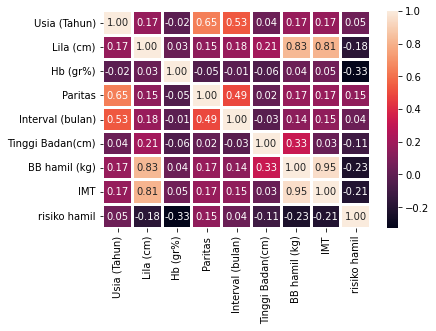

In [ ]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True, fmt='.2f', linewidths=2)

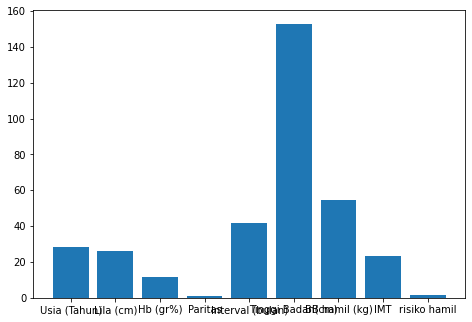

In [ ]:
arrData = np.array(data)
mean = [
        stat.mean(arrData[:,0]),
        stat.mean(arrData[:,1]),
        stat.mean(arrData[:,2]),
        stat.mean(arrData[:,3]),
        stat.mean(arrData[:,4]),
        stat.mean(arrData[:,5]),
        stat.mean(arrData[:,6]),
        stat.mean(arrData[:,7]),
        stat.mean(arrData[:,8])
]
legends = ['Usia (Tahun)','Lila (cm)','Hb (gr%)','Paritas','Interval (bulan)',
           'Tinggi Badan(cm)','BB hamil (kg)','IMT','risiko hamil']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(legends,mean)
plt.show()


In [ ]:
data.quantile([.25, .5, .75], axis = 0)

,Usia (Tahun),Lila (cm),Hb (gr%),Paritas,Interval (bulan),Tinggi Badan(cm),BB hamil (kg),IMT,risiko hamil
0.25,24.0,24.0,11.0,0.0,0.0,150.0,47.0,20.291341,1.0
0.50,28.0,26.0,11.3,1.0,42.0,153.0,52.5,22.506925,1.0
0.75,32.0,28.0,11.6,1.0,72.0,155.0,60.0,25.654372,2.0


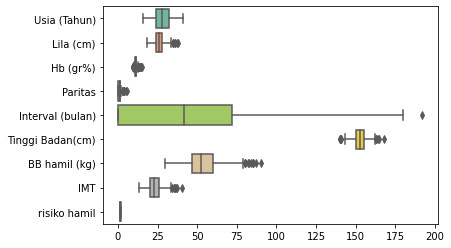

In [ ]:
sns.boxplot(data=data, orient="h", palette="Set2")

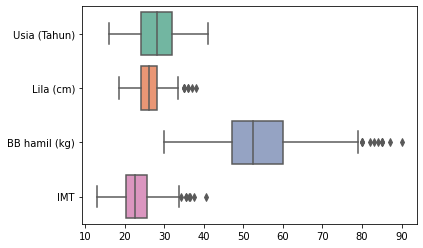

In [ ]:
sns.boxplot(data=data[['Usia (Tahun)','Lila (cm)', 'BB hamil (kg)', 'IMT']], orient="h", palette="Set2")

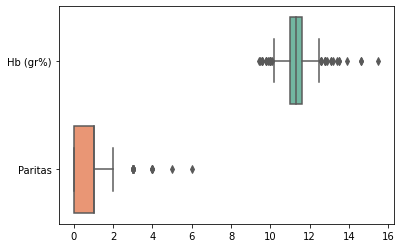

In [ ]:
sns.boxplot(data=data[['Hb (gr%)','Paritas']], orient="h", palette="Set2")

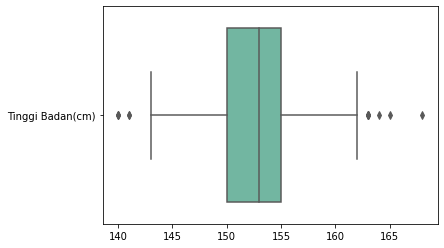

In [ ]:
sns.boxplot(data=data[['Tinggi Badan(cm)']], orient="h", palette="Set2")

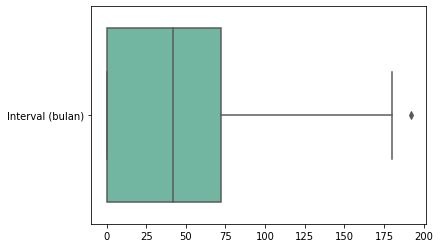

In [ ]:
sns.boxplot(data=data[['Interval (bulan)']], orient="h", palette="Set2")

In [ ]:
# 0 = bukan stunting
# 1 = stunting
data['risiko hamil'] = data['risiko hamil'].apply(lambda value: 0 if value == 1 else 1)
data

,Usia (Tahun),Lila (cm),Hb (gr%),Paritas,Interval (bulan),Tinggi Badan(cm),BB hamil (kg),IMT,risiko hamil
0,32.0,25.0,11.3,1.0,48.0,158.0,49.0,19.628265,0
1,29.0,24.0,11.4,1.0,96.0,153.0,49.0,20.932120,0
2,23.0,27.0,12.0,0.0,0.0,153.0,49.0,20.932120,0
3,28.0,28.0,11.6,0.0,0.0,155.0,60.0,24.973985,0
4,24.0,28.0,12.0,1.0,72.0,150.0,58.0,25.777778,0
...,...,...,...,...,...,...,...,...,...
388,26.0,24.0,12.6,0.0,0.0,152.0,51.0,22.074100,0
389,38.0,25.0,11.2,1.0,144.0,150.0,45.0,20.000000,1
390,35.0,27.0,11.9,1.0,60.0,156.0,55.0,22.600263,0
391,30.0,28.0,11.6,1.0,96.0,153.0,60.0,25.631167,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


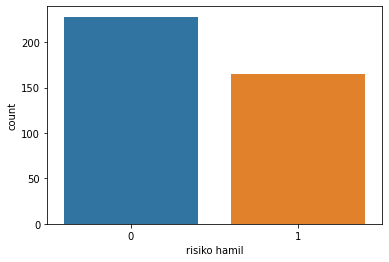

In [ ]:
sns.countplot(data['risiko hamil'])

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('risiko hamil', axis=1)
y = data['risiko hamil']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print("Jumlah Data Train : {0}".format(len(X_train)))
print("Jumlah Data Test : {0}".format(len(X_test)))

Jumlah Data Train : 314
Jumlah Data Test : 79


In [ ]:
history =  pd.DataFrame(columns=['model', 'fprs', 'tprs', 'auc_score', 'acc', 'recall', 'precision'])
history

model = ["Random Forest", "SVM", "XGBoost"]
test_fprs = [] 
test_tprs = []
auc_scores = []
accs = []
recalls = []
precisions = []

In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np

def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = clf.predict_proba(X_train.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y_train.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

def performance_meansure(X_test):
  acc = accuracy_score(y_test, preds)
  recall = recall_score(y_test, preds)
  precision = precision_score(y_test, preds)

  print("Accuracy = {0} \nRecall = {1} \nPrecision = {2}".format(acc, recall,precision))
  cm = confusion_matrix(y_test, preds)
  plt.figure(figsize=(8, 6))
  plt.title('Confusion Matrix', size=16)
  sns.heatmap(cm, annot=True, cmap='Blues');

  accs.append(acc)
  recalls.append(recall)
  precisions.append(precision)


#==================== RF ===================

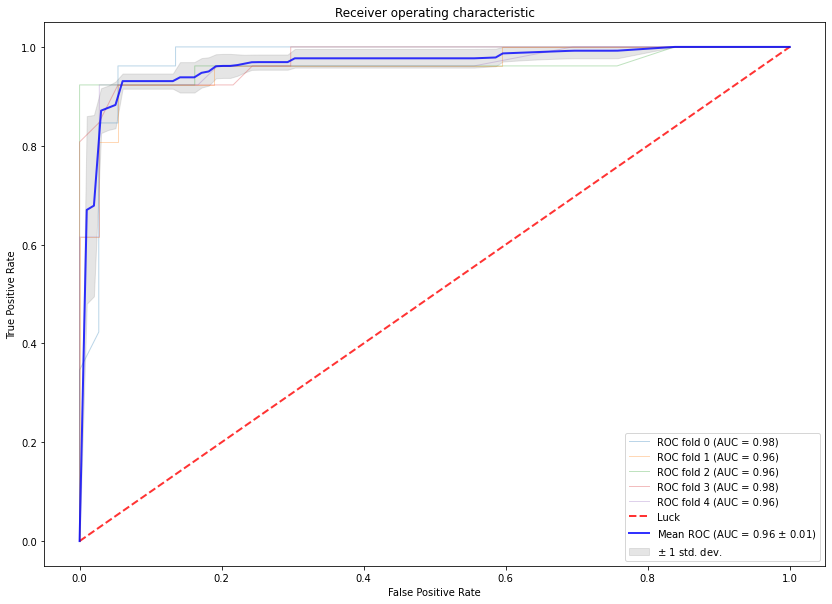

   AUC Train  AUC Test
0        1.0  0.976091
1        1.0  0.958420
2        1.0  0.963098
3        1.0  0.976091
4        1.0  0.960470


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

clf  = RandomForestClassifier()

n = 5
cv = StratifiedKFold(n_splits=n, shuffle=False)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X_train, y_train), range(n)):
    clf.fit(X_train.iloc[train], y_train.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
score_pd=pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])
print(score_pd)

test_fprs.append(fprs)
test_tprs.append(tprs)
auc_scores.append(score_pd['AUC Test'])


Accuracy = 0.8860759493670886 
Recall = 0.8 
Precision = 0.9333333333333333


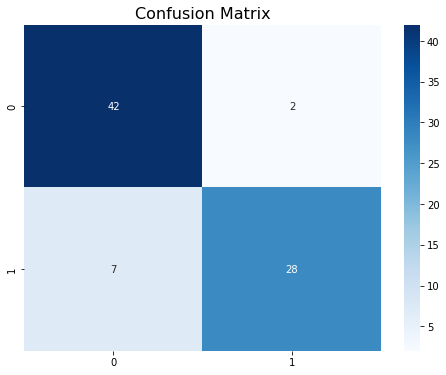

In [ ]:
preds = clf.predict(X_test)
performance_meansure(X_test)

#==================== SVM ===================

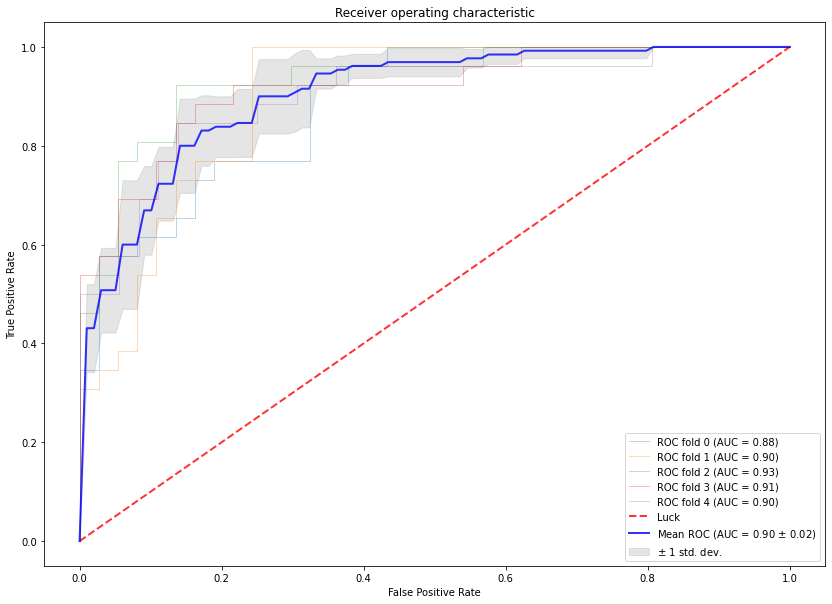

   AUC Train  AUC Test
0   0.962847  0.884615
1   0.976583  0.899168
2   0.968014  0.933472
3   0.970369  0.914761
4   0.972388  0.900641


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVC
clf = make_pipeline(StandardScaler(), NuSVC(probability=True))

n = 5
cv = StratifiedKFold(n_splits=n, shuffle=False)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X_train, y_train), range(n)):
    clf.fit(X_train.iloc[train], y_train.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
score_pd=pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])
print(score_pd)

test_fprs.append(fprs)
test_tprs.append(tprs)
auc_scores.append(score_pd['AUC Test'])

Accuracy = 0.8481012658227848 
Recall = 0.6857142857142857 
Precision = 0.96


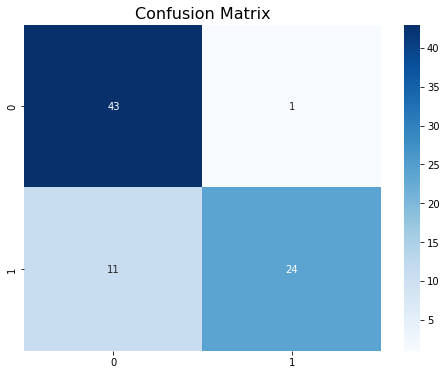

In [ ]:
preds = clf.predict(X_test)
performance_meansure(X_test)

#==================== XGBoost ===================

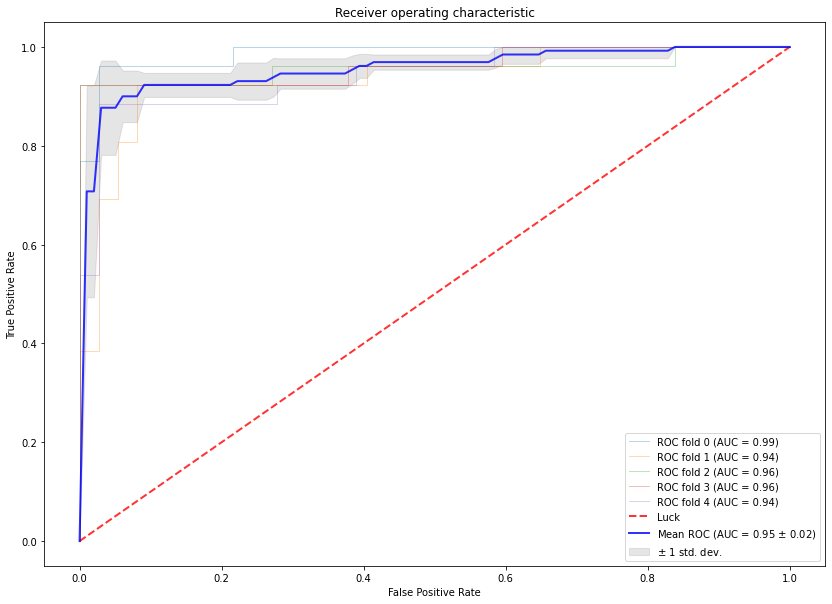

   AUC Train  AUC Test
0   0.998823  0.986486
1   1.000000  0.935551
2   0.999019  0.957380
3   0.999280  0.962578
4   0.999025  0.942308


In [ ]:
# Training XGBoost on the Training set
from xgboost import XGBClassifier
clf = XGBClassifier()

n = [3,5,7,10]
cv = StratifiedKFold(n_splits=n, shuffle=False)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X_train, y_train), range(n)):
    clf.fit(X_train.iloc[train], y_train.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
score_pd=pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])
print(score_pd)

test_fprs.append(fprs)
test_tprs.append(tprs)
auc_scores.append(score_pd['AUC Test'])


Accuracy = 0.9113924050632911 
Recall = 0.8857142857142857 
Precision = 0.9117647058823529


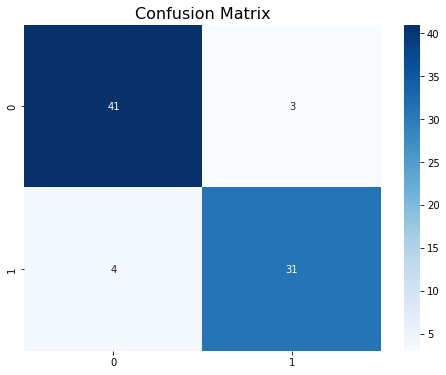

In [ ]:
preds = clf.predict(X_test)
performance_meansure(X_test)

In [ ]:
len(auc_scores)
print(auc_scores[0].to_numpy())

[0.97609148 0.95841996 0.96309771 0.97609148 0.96047009]


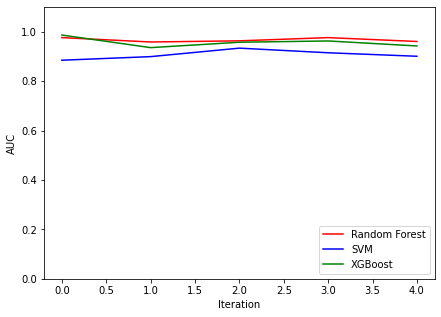

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
colour = ['r', 'b', 'g']
for i in range(len(auc_scores)):
  ax.plot(auc_scores[i].to_numpy(), label=model[i], color =colour[i])
ax.set_xlabel('Iteration')
ax.set_ylabel('AUC')
ax.legend(loc="lower right")
plt.ylim(0,1.1)
plt.show()

In [ ]:
d = {'Model': model, 'Accuracy': accs , 'Recall': recalls, 'Precision': precisions}
pd.DataFrame(data=d)

,Model,Accuracy,Recall,Precision
0,Random Forest,0.886076,0.800000,0.933333
1,SVM,0.848101,0.685714,0.960000
2,XGBoost,0.911392,0.885714,0.911765


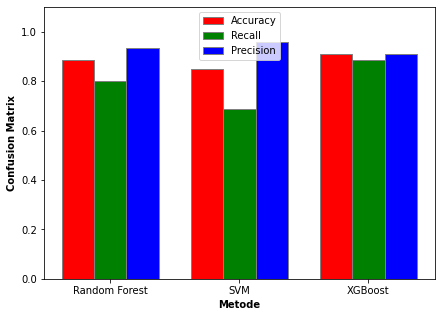

In [ ]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(7,5))
 
# set height of bar
 
# Set position of bar on X axis
br1 = np.arange(len(model))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, accs, color ='r', width = barWidth,
        edgecolor ='grey', label ='Accuracy')
plt.bar(br2, recalls, color ='g', width = barWidth,
        edgecolor ='grey', label ='Recall')
plt.bar(br3, precisions, color ='b', width = barWidth,
        edgecolor ='grey', label ='Precision')
 
# Adding Xticks
plt.xlabel('Metode', fontweight ='bold')
plt.ylabel('Confusion Matrix', fontweight ='bold')
plt.xticks([r + barWidth for r in range(len(model))],model)
 
plt.ylim(0,1.1)
plt.legend()
plt.show()

In [ ]:
accs

[0.8860759493670886, 0.8481012658227848, 0.9113924050632911]